In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
def process_df(filepath):
    df = pd.read_csv(filepath, skiprows=2)
    
    df.columns = ['Time', 'Voltage', 'Current']
    df = df[df['Current'] > 0]
    
    df['Time'] = df['Time'] / 1000
    df['Time'] = pd.to_datetime(df['Time'], unit='s')
    df['Time'] = df['Time'].dt.strftime('%H:%M:%S')
    
    df['Power'] = (df['Current'] * 5.2)*1000
    return df.dropna()

def plot_variables(df, time_col, var):
    
    mean_var = df[var].mean()
    
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(df[time_col], df[var], label=var, color='blue')
    
    ax.set_xlabel(time_col)
    ax.set_ylabel(var)
    ax.set_title(f'{var} against {time_col}')
    
    ax.axhline(y=mean_var, color='red', linestyle='--', linewidth=1.5, label=f'Mean {var}: {mean_var:.2f}')
   
    ax.legend()
    plt.xticks(rotation=45)
    plt.xticks(df[time_col][::50])  
    plt.show()

In [27]:
df = process_df('C:/Users/mukiibirogers/OneDrive/Documents/Powermonitoring/arduino_data/data04.csv')
df.head()

,Time,Voltage,Current,Power
1,00:00:00,4.99,0.01,52.0
3,00:00:01,4.99,0.01,52.0
4,00:00:01,4.99,0.01,52.0
6,00:00:01,4.99,0.01,52.0
7,00:00:02,4.99,0.01,52.0


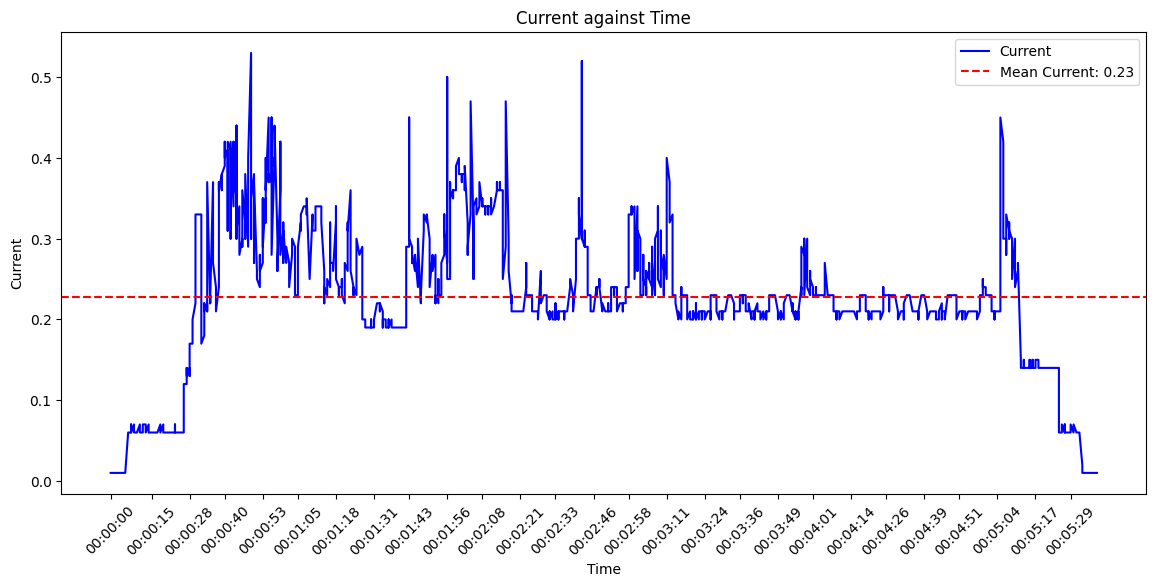

In [23]:
plot_variables(df, 'Time', 'Current')

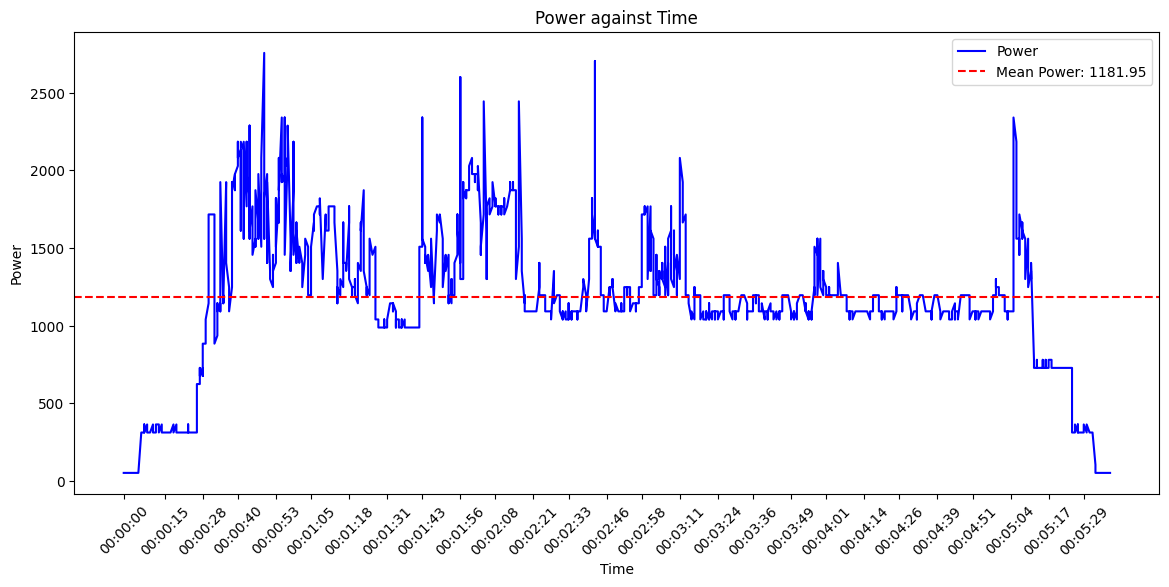

In [28]:
plot_variables(df, 'Time', 'Power')

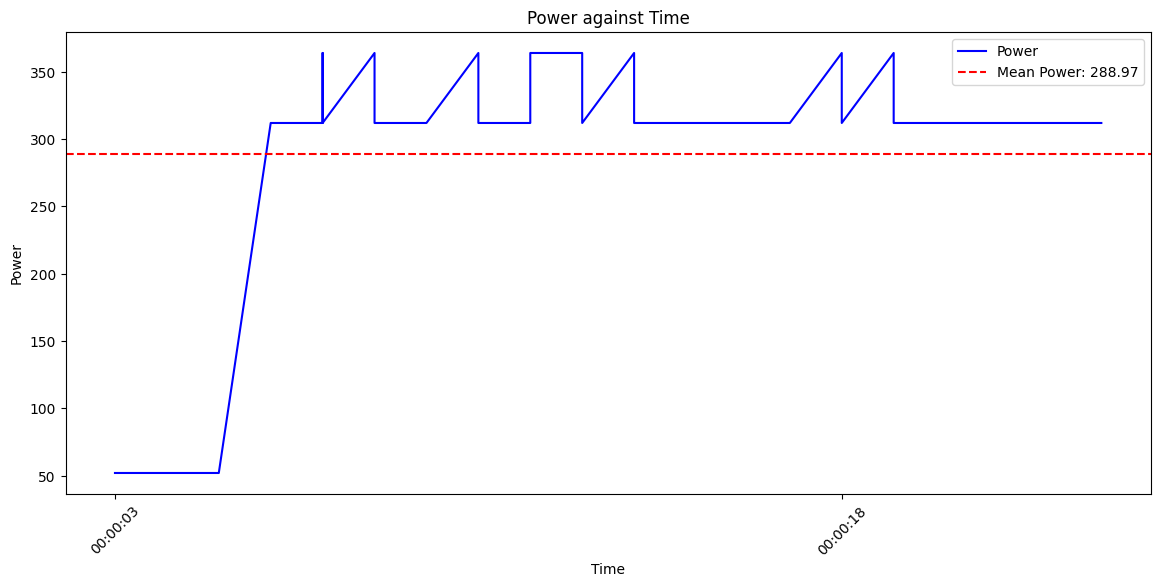

In [32]:
plot_variables(df.iloc[10:80], 'Time', 'Power')